In [7]:
import polars as pl
from pathlib import Path
import json
import os

In [12]:
print(os.getcwd())
base_path = "/Users/brunostordeur/Docs/GitHub/Memecoins/src/"

/Users/brunostordeur/Docs/GitHub/Memecoins/notebooks/exploration


In [56]:
memecoins_list_path = Path(f"{base_path}daily_data_1000/memecoins_list.parquet")
memecoins_df = pl.read_parquet(memecoins_list_path)

memecoins_df.head()

id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
str,str,str,str,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,null,str
"""dogecoin""","""doge""","""Dogecoin""","""https://coin-images.coingecko.…",0.239301,35680009357,8,35693179421,2.9523e9,0.23904,0.218595,0.012846,5.67254,1.8418e9,5.44297,1.4919e11,1.4925e11,null,0.731578,-67.3538,"""2021-05-08T05:08:23.458Z""",0.0000869,274724.1159,"""2015-05-06T00:00:00.000Z""",null,"""2025-05-13T19:30:04.788Z"""
"""shiba-inu""","""shib""","""Shiba Inu""","""https://coin-images.coingecko.…",0.000016,9617073504,18,9621226091,5.52906767e8,0.000016,0.000015,9.6340e-7,6.25261,5.31913122e8,5.85475,5.8925e14,5.8950e14,null,0.000086,-81.06536,"""2021-10-28T03:54:55.568Z""",5.6366e-11,2.8942e7,"""2020-11-28T11:26:25.838Z""",null,"""2025-05-13T19:30:02.062Z"""
"""pepe""","""pepe""","""Pepe""","""https://coin-images.coingecko.…",0.000015,6164515149,31,6164515149,2.3761e9,0.000015,0.0000129,0.0000014,10.54947,5.80599998e8,10.39772,4.2069e14,4.2069e14,4.2069e14,0.000028,-47.71747,"""2024-12-09T16:30:35.828Z""",5.5142e-8,26474.55556,"""2023-04-18T02:14:41.591Z""",null,"""2025-05-13T19:30:10.811Z"""
"""official-trump""","""trump""","""Official Trump""","""https://coin-images.coingecko.…",13.49,2697153341,54,13485768332,1.5973e9,13.46,12.34,0.948395,7.56358,1.82865335e8,7.27305,2.0000e8,1.0000e9,1.0000e9,73.43,-81.64134,"""2025-01-19T11:50:34.806Z""",4.29,214.19022,"""2025-01-18T03:40:29.231Z""",null,"""2025-05-13T19:30:09.920Z"""
"""bonk""","""bonk""","""Bonk""","""https://coin-images.coingecko.…",0.000023,1797878296,71,2062624948,6.98240048e8,0.000023,0.000021,0.000001,5.96051,8.5152673e7,4.97176,7.7420e13,8.8820e13,8.8820e13,0.000058,-60.13334,"""2024-11-20T04:01:06.465Z""",8.6142e-8,26858.13089,"""2022-12-29T22:48:46.755Z""",null,"""2025-05-13T19:30:10.214Z"""


In [21]:
""" history_folder = Path(f"{base_path}daily_data_1000/history/")
example_file = list(history_folder.glob("*.parquet"))[0] """
example_df = pl.read_parquet(Path(f"{base_path}daily_data_1000/history/dogecoin_daily.parquet"))

example_df.head()

timestamp,price,market_cap,volume
datetime[ns],f64,f64,f64
2024-05-14 00:00:00,0.148418,2.1421e10,1.8930e9
2024-05-15 00:00:00,0.145422,2.0961e10,1.5735e9
2024-05-16 00:00:00,0.15571,2.2551e10,1.4607e9
2024-05-17 00:00:00,0.149711,2.1623e10,1.1541e9
2024-05-18 00:00:00,0.155671,2.2451e10,9.5120e8


In [28]:
import polars as pl
from pathlib import Path
import numpy as np
from tqdm.notebook import tqdm

# --- Paths ---
history_folder = Path(f"{base_path}daily_data_1000/history/")
files = list(history_folder.glob("*.parquet"))

# --- Metric Computation ---
def compute_metrics(df: pl.DataFrame) -> dict:
    df = df.sort("timestamp")
    prices = df["price"].to_numpy()

    if len(prices) < 2 or prices[0] == 0:
        return None  # skip bad data

    # Total return
    ret = (prices[-1] - prices[0]) / prices[0]

    # Log returns
    log_returns = np.diff(np.log(prices))
    vol = np.std(log_returns)

    # Max drawdown
    running_max = np.maximum.accumulate(prices)
    drawdowns = (prices - running_max) / running_max
    max_dd = drawdowns.min()

    return {
        "return": ret,
        "volatility": vol,
        "max_drawdown": max_dd
    }

# --- Loop over all files ---
results = []

for file in tqdm(files):
    symbol = file.stem  # unique memecoin identifier
    print(symbol)
    try:
        df = pl.read_parquet(file)
        metrics = compute_metrics(df)
        if metrics:
            metrics["symbol"] = symbol
            results.append(metrics)
    except Exception:
        continue



  0%|          | 0/761 [00:00<?, ?it/s]

trog_daily
notcoin_daily
luna-by-virtuals_daily
maga-hat_daily
the-last-play_daily
donald-tremp_daily
silly-dragon_daily
skull-of-pepe-token_daily
pundu_daily
chill-house_daily
max-on-eth_daily
guanciale_daily
keke-terminal_daily
mumu-the-bull-3_daily
guacamole_daily
piggy-2_daily
360noscope420blazeit_daily
tutorial_daily
bnb-card_daily
oscar_daily
pepecat-2_daily
troll_daily
ahatoken_daily
realis-worlds_daily
ai-slop_daily
super-anon_daily
parabolic-3_daily
orc_daily
gigachad-2_daily
vine_daily
christ-is-king_daily
pumpkin-4_daily
feg-token-2_daily
tron-bull_daily
troll-2_daily
carlo_daily
hemule_daily
memecoin-2_daily
realgoat_daily
bobacat_daily
puss_daily
pain_daily
ben-the-dog_daily
based-fartcoin_daily
prophet-of-ethereum_daily
ivy-2_daily
neiro_daily
dogc_daily
catwifhat-2_daily
memes_daily
pepebrc_daily
ai-rig-complex_daily
banano_daily
wai-combinator-by-virtuals_daily
andy-on-base_daily
dogwifcoin_daily
solxencat_daily
dasha_daily
slerf_daily
neet_daily
beni_daily
sobull_daily

In [31]:
# --- Create Polars DataFrame ---
metrics_df = pl.DataFrame(results)
metrics_df = metrics_df.sort("return", descending=True)

metrics_df.head(10)

return,volatility,max_drawdown,symbol
f64,f64,f64,str
432.206541,0.49075,-0.682101,"""tronkey_daily"""
224.348782,0.680684,-0.977971,"""tron-bull_daily"""
134.293821,0.235138,-0.943154,"""neiro-3_daily"""
131.133691,0.354616,-0.959115,"""catcoin_daily"""
128.032649,0.129177,-0.809752,"""spx6900_daily"""
113.912844,0.357853,-0.696769,"""titcoin-2_daily"""
59.070883,0.128544,-0.909042,"""cheems-token_daily"""
54.421946,0.348968,-0.700456,"""tutorial_daily"""
48.681167,0.137896,-0.951986,"""blub_daily"""


In [34]:
threshold = metrics_df.select(
    pl.col("return").quantile(0.95, interpolation="nearest")
).item()

metrics_df = metrics_df.with_columns(
    (pl.col("return") >= threshold).cast(pl.Int8).alias("top_performer")
)

metrics_df.sort("return", descending=True).head(10)

return,volatility,max_drawdown,symbol,top_performer
f64,f64,f64,str,i8
432.206541,0.49075,-0.682101,"""tronkey_daily""",1
224.348782,0.680684,-0.977971,"""tron-bull_daily""",1
134.293821,0.235138,-0.943154,"""neiro-3_daily""",1
131.133691,0.354616,-0.959115,"""catcoin_daily""",1
128.032649,0.129177,-0.809752,"""spx6900_daily""",1
113.912844,0.357853,-0.696769,"""titcoin-2_daily""",1
59.070883,0.128544,-0.909042,"""cheems-token_daily""",1
54.421946,0.348968,-0.700456,"""tutorial_daily""",1
48.681167,0.137896,-0.951986,"""blub_daily""",1


In [51]:
list(metrics_df.filter(pl.col("top_performer")==1).select("symbol"))


[shape: (39,)
 Series: 'symbol' [str]
 [
 	"tronkey"
 	"tron-bull"
 	"neiro-3"
 	"catcoin"
 	"spx6900"
 	…
 	"zygo-the-frog"
 	"book-of-ethereum"
 	"kolin-2"
 	"agenda-47"
 	"aintivirus"
 ]]

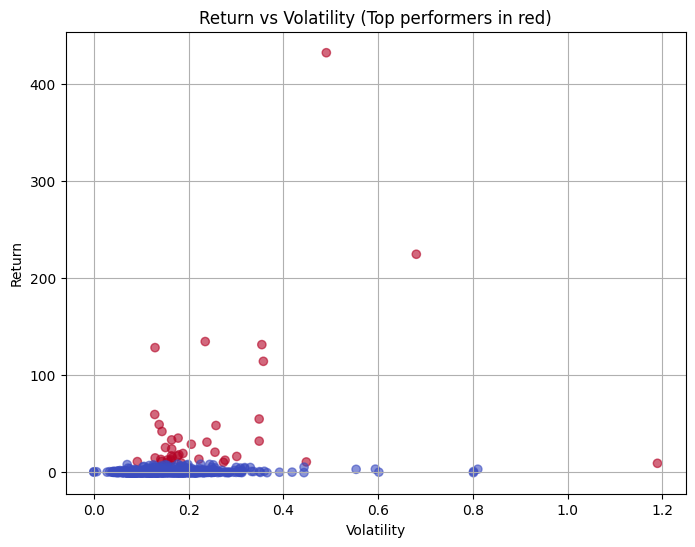

In [35]:
import matplotlib.pyplot as plt

# Convert to numpy for plotting
returns = metrics_df["return"].to_numpy()
vols = metrics_df["volatility"].to_numpy()
labels = metrics_df["top_performer"].to_numpy()

plt.figure(figsize=(8,6))
plt.scatter(vols, returns, c=labels, cmap="coolwarm", alpha=0.6)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Return vs Volatility (Top performers in red)")
plt.grid(True)
plt.show()


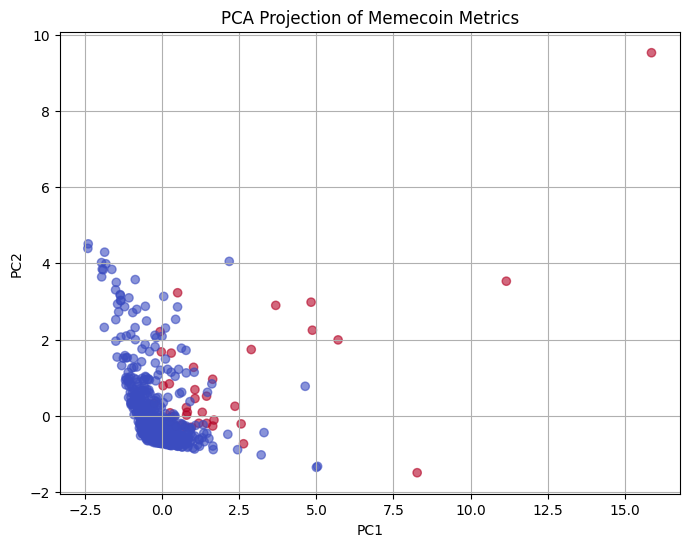

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features
X = metrics_df.select(["return", "volatility", "max_drawdown"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="coolwarm", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Memecoin Metrics")
plt.grid(True)
plt.show()


In [40]:
metrics_df= metrics_df.with_columns(pl.col("symbol").str.replace("_daily", ""))
metrics_df 

return,volatility,max_drawdown,symbol,top_performer
f64,f64,f64,str,i8
432.206541,0.49075,-0.682101,"""tronkey""",1
224.348782,0.680684,-0.977971,"""tron-bull""",1
134.293821,0.235138,-0.943154,"""neiro-3""",1
131.133691,0.354616,-0.959115,"""catcoin""",1
128.032649,0.129177,-0.809752,"""spx6900""",1
…,…,…,…,…
-0.988007,0.121369,-0.99219,"""baby-bnb""",0
-0.988711,0.166882,-0.9949,"""litecoin-mascot""",0
-0.989165,0.178799,-0.9955,"""jeo-boden""",0


In [42]:
def extract_early_features(df: pl.DataFrame, days: int = 3) -> dict:
    df = df.sort("timestamp").head(days)

    if df.height < days:
        return None

    prices = df["price"].to_numpy()
    market_caps = df["market_cap"].to_numpy()
    volumes = df["volume"].to_numpy()

    ret_3d = (prices[-1] - prices[0]) / prices[0]
    vol_3d = np.std(np.diff(np.log(prices)))
    cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]
    vol_avg = np.mean(volumes)
    pos_days = np.sum(np.diff(prices) > 0)

    return {
        "early_return": ret_3d,
        "early_volatility": vol_3d,
        "marketcap_growth": cap_change,
        "avg_volume": vol_avg,
        "positive_days": pos_days
    }


In [43]:
early_features = []

for file in tqdm(files):
    symbol = file.stem
    try:
        df = pl.read_parquet(file)
        features = extract_early_features(df, days=3)
        if features:
            features["symbol"] = symbol
            early_features.append(features)
    except:
        continue

early_df = pl.DataFrame(early_features)

# Example usage:


  0%|          | 0/761 [00:00<?, ?it/s]

/var/folders/fd/7nflbhgd79bc_g28mlzphckw0000gn/T/ipykernel_62030/4173671625.py:13: RuntimeWarning: invalid value encountered in scalar divide
  cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]
/var/folders/fd/7nflbhgd79bc_g28mlzphckw0000gn/T/ipykernel_62030/4173671625.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  cap_change = (market_caps[-1] - market_caps[0]) / market_caps[0]


In [44]:
early_df

early_return,early_volatility,marketcap_growth,avg_volume,positive_days,symbol
f64,f64,f64,f64,i64,str
1.120802,0.375897,NaN,1.0247e7,1,"""trog_daily"""
-0.070234,0.036411,NaN,8.0483e8,0,"""notcoin_daily"""
1.926245,0.53686,inf,1.9313e6,1,"""luna-by-virtuals_daily"""
-0.1394,0.075063,NaN,3.6067e7,0,"""maga-hat_daily"""
-0.257212,0.148672,NaN,2.9304e6,0,"""the-last-play_daily"""
…,…,…,…,…,…
-0.278366,0.168913,inf,986626.674025,1,"""nobody-sausage_daily"""
-0.128383,0.068702,NaN,161699.485093,0,"""gluteus-maximus-by-virtuals_da…"
0.151724,0.015372,NaN,28727.344958,2,"""toad-killer_daily"""


In [43]:
train_df = early_df.join(metrics_df.select(["symbol", "top_performer"]), on="symbol", how="inner")

# Optional: sort by label to inspect
train_df = train_df.sort("top_performer", descending=True)
train_df.head()

In [54]:
with open(Path(f"{base_path}daily_data_1000/snapshots/dogecoin_snapshot.json"), 'r') as f:
    example_snapshot = json.load(f)

In [55]:
example_snapshot

{'id': 'dogecoin',
 'symbol': 'doge',
 'name': 'Dogecoin',
 'web_slug': 'dogecoin',
 'asset_platform_id': None,
 'platforms': {'': ''},
 'detail_platforms': {'': {'decimal_place': None, 'contract_address': ''}},
 'block_time_in_minutes': 1,
 'hashing_algorithm': 'Scrypt',
 'categories': ['Smart Contract Platform',
  'Meme',
  'Dog-Themed',
  'Elon Musk-Inspired',
  'Proof of Work (PoW)',
  'GMCI Meme Index',
  'GMCI 30 Index',
  'GMCI Index',
  'Coinbase 50 Index',
  '4chan-Themed'],
 'preview_listing': False,
 'public_notice': None,
 'additional_notices': [],
 'localization': {'en': 'Dogecoin',
  'de': 'Dogecoin',
  'es': 'Dogecoin',
  'fr': 'Dogecoin',
  'it': 'Dogecoin',
  'pl': 'Dogecoin',
  'ro': 'Dogecoin',
  'hu': 'Dogecoin',
  'nl': 'Dogecoin',
  'pt': 'Dogecoin',
  'sv': '',
  'vi': 'Dogecoin',
  'tr': 'Dogecoin',
  'ru': 'Dogecoin',
  'ja': 'ドージコイン',
  'zh': '狗币',
  'zh-tw': '狗狗幣',
  'ko': '도지코인',
  'ar': 'الدوجكوين',
  'th': 'Dogecoin',
  'id': 'Dogecoin',
  'cs': '',
  'da'